In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial as factorial
import pandas as pd
from tqdm import tqdm
import seaborn as sn
import sys
from pathlib import Path
import matplotlib as mpl

# import custom functions from src folder
module_path = str(Path.cwd() / "../../../src")

if module_path not in sys.path:
    sys.path.append(module_path)

from util import *

In [44]:
#nxMC = [200]
nr1MC = [8000]

R2 = 3
k_red = 7
k_blue = 3
R1_min = 6
scale = 1
vary_a1 = False
vary_R2 = False #Not adapted for this yet
p_red = 0.5
tag = f'r2_{R2}_kr{k_red}_kb{k_blue}_r1min{R1_min}_s{scale}_vary_r2_{vary_R2}_vary_a1_{vary_a1}_pRed_{p_red}'

#datafiles = [f"results/analytical_solution_x1_x2_grid_{tag}_nxMC_{nxMC[i]}_nr1MC_{nr1MC[i]}.csv" for i in range(len(nr1MC))]
datafiles = [f"results/analytical_solution_x1_x2_grid_{tag}_nr1MC_{nr1MC[i]}.csv" for i in range(len(nr1MC))]

#datafile = "analytical_solution_grid_100x100_nMC_10.csv"
data_df = [pd.read_csv(file) for file in datafiles]

for i in range(len(data_df)):
    data_df[i]["P_x_given_red"] = data_df[i]["P_red_and_x"]/0.5
    data_df[i]["P_x_given_blue"] = data_df[i]["P_blue_and_x"]/0.5
    data_df[i]["P_x"] = data_df[i]["P_red_and_x"] + data_df[i]["P_blue_and_x"]


In [45]:
print(data_df[0].keys())

Index(['index', 'x1', 'x2', 'r_x', 'a_x', 'P_red_and_x', 'P_blue_and_x', 'P_x',
       'P_red_given_x', 'P_blue_given_x', 'P_x_given_red', 'P_x_given_blue'],
      dtype='object')


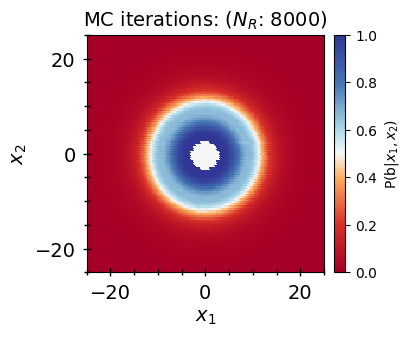

In [46]:
for i in range(len(nr1MC)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (4, 4), layout="constrained")
    data = data_df[i]
    ax = plot_grid(data, "P_blue_given_x", ax, 100)
    cmap = red_blue_cmap()
    #Plot settings
    hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
    ax.set_title(rf"MC iterations: ($N_R$: {nr1MC[i]})", fontsize=14)
    fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=cmap), fraction=0.050, pad=0.04, label=r'P(b|$x_1, x_2$)', ax=ax)
    ax.set_xlabel(r"$x_1$", fontsize=14)
    ax.set_ylabel(r"$x_2$", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.set_aspect('equal', adjustable='box')

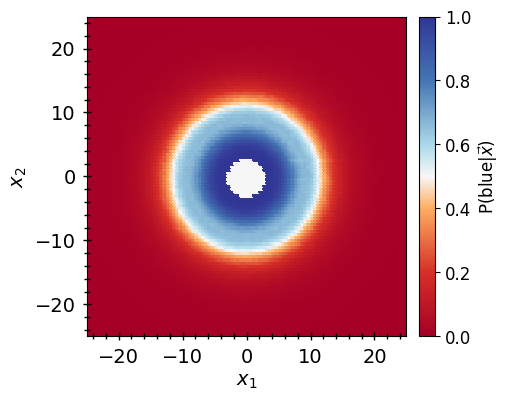

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 5), layout="constrained")

data = data_df[-1]
hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=True)
ax.hist2d(x= data["x1"], y=data["x2"], weights=data["P_blue_given_x"], 
            bins = 100,
            norm = hue_norm, cmap=red_blue_cmap(), rasterized=True, edgecolor='face')

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=red_blue_cmap()), ax=ax, fraction=0.050, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"P(blue|$\vec{x}$)", fontsize=12)


ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()
ax.set_aspect('equal', adjustable='box')

fig.savefig("../fig/analytical_solution.pdf", bbox_inches='tight', dpi=350)

In [50]:
data_df = [df[df["r_x"] > R1_min-R2] for df in data_df] # Remove undefined area

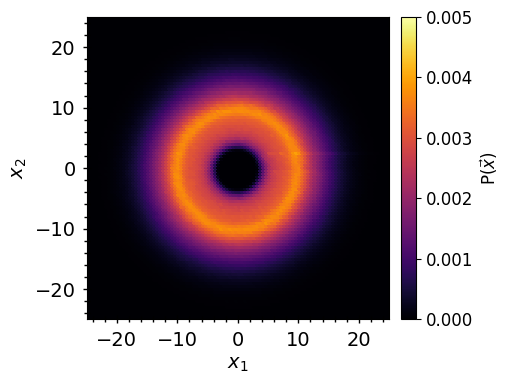

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 5), layout="constrained")

data = data_df[-1]
hue_norm = mpl.colors.Normalize(vmin=0, vmax=0.005, clip=True)
ax.hist2d(x= data["x1"], y=data["x2"], weights=data["P_x"], 
            bins = 100,
            norm = hue_norm, cmap="inferno", rasterized=True, edgecolor='face')

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), ax=ax, fraction=0.050, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"P($\vec{x}$)", fontsize=12)


ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()
ax.set_aspect('equal', adjustable='box')

fig.savefig("../fig/analytical_solution_px_2d.pdf", bbox_inches='tight', dpi=350)

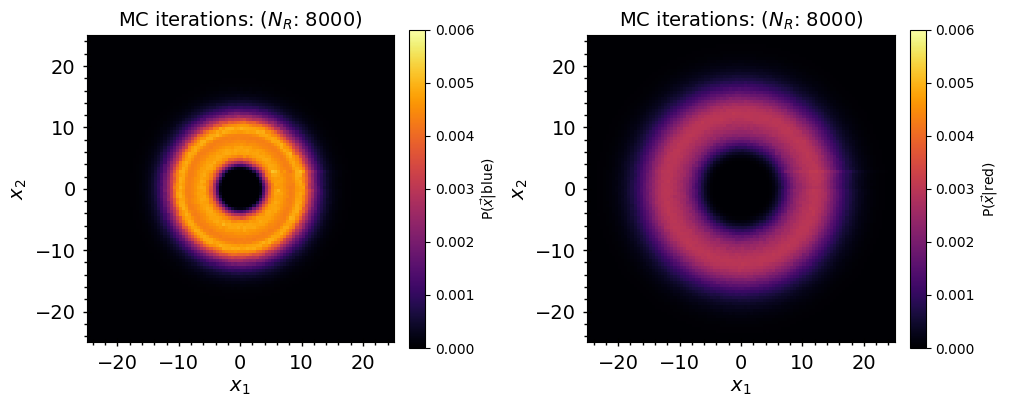

In [21]:
fig, axes = plt.subplots(nrows=(len(nr1MC)), ncols=2, figsize= (10, 4*len(nr1MC)), layout="constrained")
for i in range(len(nr1MC)):
    if len(nr1MC) > 1:
        axs = axes[i]
    else:
        axs = axes
    data = data_df[i]
    hue_norm = mpl.colors.Normalize(vmin=0, vmax=0.003/0.5, clip=True)
    axs[0].hist2d(x= data["x1"], y=data["x2"], weights=data["P_blue_and_x"]/0.5, 
                bins = 100,
                norm = hue_norm, cmap="inferno")
    
    fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), label=r"P($\vec{x}$|blue)", ax=axs[0])

    axs[1].hist2d(x= data["x1"], y=data["x2"], weights=data["P_red_and_x"]/0.5, 
                bins = 100,
                norm = hue_norm, cmap="inferno")
    
    fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), label=r"P($\vec{x}$|red)", ax=axs[1])

    for ax in axs:
        ax.set_title(rf"MC iterations: ($N_R$: {nr1MC[i]})", fontsize=14)
        ax.set_xlabel(r"$x_1$", fontsize=14)
        ax.set_ylabel(r"$x_2$", fontsize=14)
        ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
        ax.tick_params(which="major", length=6)
        ax.minorticks_on()
        ax.set_aspect('equal', adjustable='box')

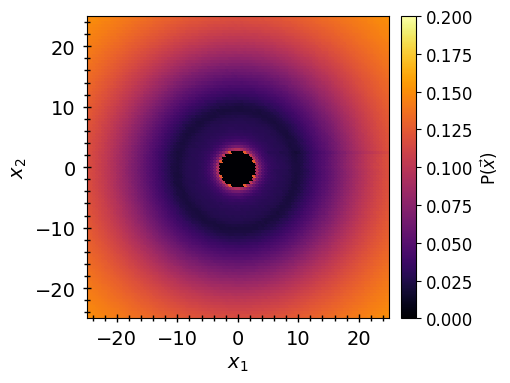

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 5), layout="constrained")

data = data_df[-1]

hue_norm = mpl.colors.Normalize(vmin=0, vmax=0.2, clip=True)
ax.hist2d(x= data["x1"], y=data["x2"], weights=0.2+1/np.log(data["P_x"]), 
            bins = 100,
            norm = hue_norm, cmap="inferno", rasterized=True, edgecolor='face')

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), ax=ax, fraction=0.050, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"P($\vec{x}$)", fontsize=12)


ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()
ax.set_aspect('equal', adjustable='box')

#fig.savefig("../fig/analytical_solution.pdf", bbox_inches='tight', dpi=350)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


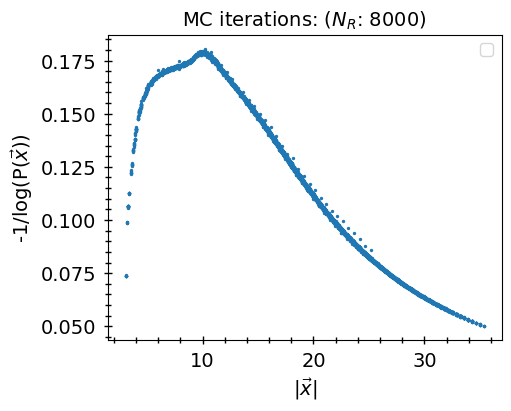

In [31]:
fig, axs = plt.subplots(nrows=(len(nr1MC)), ncols=1, figsize= (5, 4*len(nr1MC)), layout="constrained")
for i in range(len(nr1MC)):
    file = datafiles[i]
    if len(nr1MC) > 1:
        ax = axs[i]
    else:
        ax = axs
    #sn.scatterplot(data_df[i], x="r_x", y="P_x", s=2, ax = ax, label="Analytical distribution", linewidth=0)
    ax.scatter(data_df[i]["r_x"], -1/np.log(data_df[i]["P_x"]), s=2)
    
    ax.set_title(rf"MC iterations: ($N_R$: {nr1MC[i]})", fontsize=14)
    ax.set_xlabel(r"$|\vec{x}|$", fontsize=14)
    ax.set_ylabel(r"-1/log(P($\vec{x}$))", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.legend(markerscale=5, fontsize=12)

In [8]:
# Read files
train_n = 50000
trainfile = f"train_n_{train_n}_{tag}"
train_data = pd.read_csv(f"../data/{trainfile}.csv")

### Binning is super important for precise results here

/tmp/ipykernel_18539/1959367863.py:5: RuntimeWarning: invalid value encountered in scalar divide
  fraction_blue = np.array([(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))])


Estimated optimal accuracy: 0.736054122215328


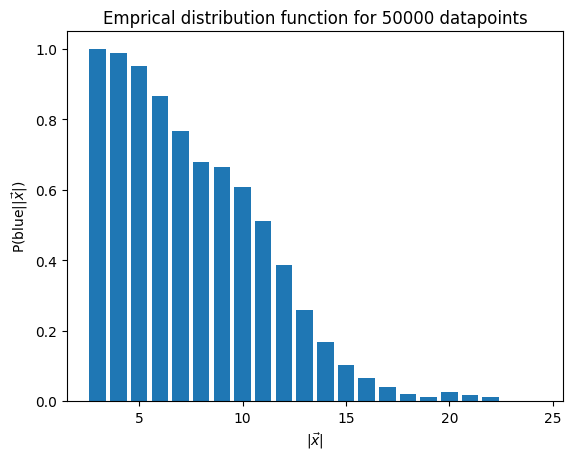

In [9]:
red_rx = train_data[train_data["color"] == "red"]["r_x"].values
blue_rx = train_data[train_data["color"] == "blue"]["r_x"].values
red_count, red_bins = np.histogram(red_rx, bins=25, range=(0, 25))
blue_count, blue_bins = np.histogram(blue_rx, bins=25, range=(0, 25))
fraction_blue = np.array([(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))])
fraction_red = 1 - fraction_blue
plt.bar(red_bins[0:-1], fraction_blue)
plt.title(f"Emprical distribution function for {len(train_data)} datapoints")
plt.xlabel(r"$|\vec{x}|$")
plt.ylabel(r"P(blue||$\vec{x}$|)")
acc = np.array([max(fraction_blue[i], fraction_red[i])*(red_count[i]+blue_count[i])/sum(red_count + blue_count) for i in range(len(red_count))])
max_acc = sum(acc[~np.isnan(acc)])
print(f"Estimated optimal accuracy: {max_acc}")

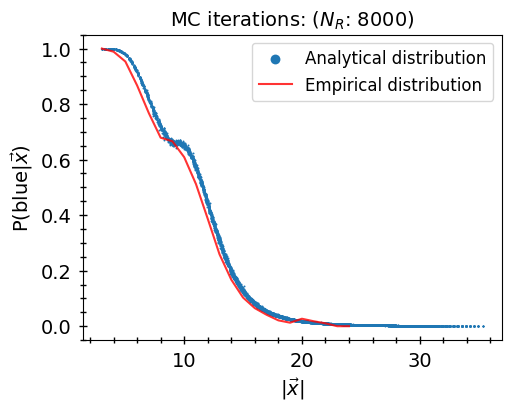

In [10]:
fig, axs = plt.subplots(nrows=(len(nr1MC)), ncols=1, figsize= (5, 4*len(nr1MC)), layout="constrained")
for i in range(len(nr1MC)):
    file = datafiles[i]
    if len(nr1MC) > 1:
        ax = axs[i]
    else:
        ax = axs
    sn.scatterplot(data_df[i], x="r_x", y="P_blue_given_x", s=2, ax = ax, label="Analytical distribution", linewidth=0)
    
    ax.plot(red_bins[0:-1], fraction_blue, label="Empirical distribution", color="red", alpha=0.8)
    ax.set_title(rf"MC iterations: ($N_R$: {nr1MC[i]})", fontsize=14)
    ax.set_xlabel(r"$|\vec{x}|$", fontsize=14)
    ax.set_ylabel(r"P(blue|$\vec{x}$)", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.legend(markerscale=5, fontsize=12)

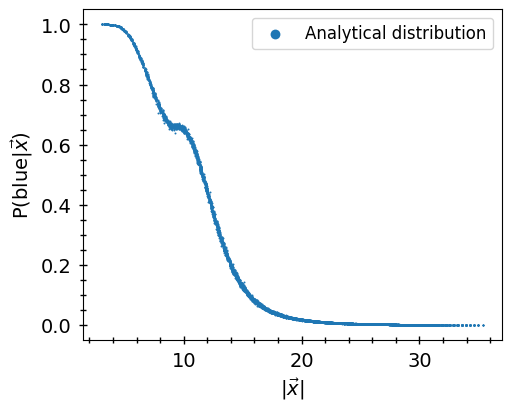

In [51]:
fig, axs = plt.subplots(nrows=(len(nr1MC)), ncols=1, figsize= (5, 4*len(nr1MC)), layout="constrained")
for i in range(len(nr1MC)):
    file = datafiles[i]
    if len(nr1MC) > 1:
        ax = axs[i]
    else:
        ax = axs
    sn.scatterplot(data_df[i], x="r_x", y="P_blue_given_x", s=2, ax = ax, label="Analytical distribution", linewidth=0)
    
    #ax.set_title(rf"MC iterations: ($N_R$: {nr1MC[i]})", fontsize=14)
    ax.set_xlabel(r"$|\vec{x}|$", fontsize=14)
    ax.set_ylabel(r"P(blue|$\vec{x}$)", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.legend(markerscale=5, fontsize=12)

    fig.savefig("../fig/analytical_solution_1d.pdf", bbox_inches='tight', dpi=350)

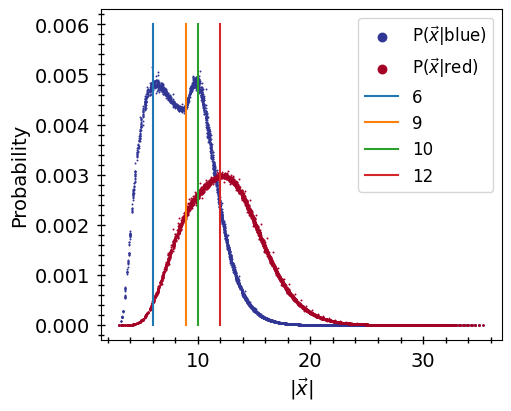

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize= (5, 4), layout="constrained")

sn.scatterplot(data_df[-1], x="r_x", y="P_x_given_blue", s=2, alpha=1, ax = axs, label=r"P($\vec{x}$|blue)", c="#313695", linewidth=0)
sn.scatterplot(data_df[-1], x="r_x", y="P_x_given_red", s=2, alpha=1, ax = axs, label=r"P($\vec{x}$|red)", c="#a50026", linewidth=0)

axs.plot([6, 6], [0, 0.006], label="6")
axs.plot([9, 9], [0, 0.006], label="9")
axs.plot([10, 10], [0, 0.006], label="10")
axs.plot([12, 12], [0, 0.006], label="12")
axs.set_xlabel(r"$|\vec{x}|$", fontsize=14)
axs.set_ylabel("Probability", fontsize=14)
axs.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
axs.tick_params(which="major", length=6)
axs.minorticks_on()
axs.legend(markerscale=5, fontsize=12)

#fig.savefig("../fig/analytical_solution_px.pdf", bbox_inches='tight', dpi=350)

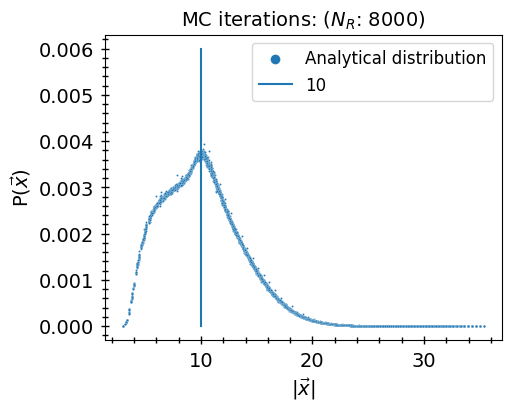

In [57]:
fig, axs = plt.subplots(nrows=(len(nr1MC)), ncols=1, figsize= (5, 4*len(nr1MC)), layout="constrained")
for i in range(len(nr1MC)):
    if len(nr1MC) > 1:
        ax = axs[i]
    else:
        ax = axs
    
    sn.scatterplot(data_df[i], x="r_x", y="P_x", s=2, ax = ax, label="Analytical distribution")
    axs.plot([10, 10], [0, 0.006], label="10")
    ax.set_title(rf"MC iterations: ($N_R$: {nr1MC[i]})", fontsize=14)
    ax.set_xlabel(r"$|\vec{x}|$", fontsize=14)
    ax.set_ylabel(r"P($\vec{x}$)", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.legend(markerscale=5, fontsize=12)

In [27]:
testfile = "results/analytical_solution_test_n_10000_r2_3_kr7_kb3_r1min6_s1_vary_r2_False_vary_a1_False_pRed_0.5_nxMC_200_nr1MC_100.csv"
calfile = "results/analytical_solution_cal_n_2000_r2_3_kr7_kb3_r1min6_s1_vary_r2_False_vary_a1_False_pRed_0.5_nxMC_200_nr1MC_100.csv"
test_df = pd.read_csv(testfile)
cal_df = pd.read_csv(calfile)

<Axes: xlabel='r_x', ylabel='P_blue_given_x'>

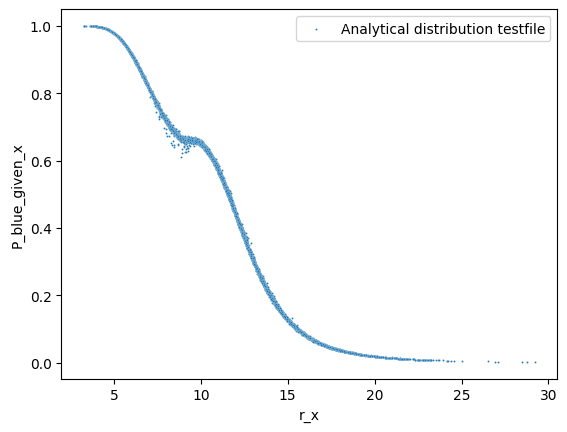

In [28]:
sn.scatterplot(test_df, x="r_x", y="P_blue_given_x", s=2, label="Analytical distribution testfile")

<Axes: xlabel='r_x', ylabel='P_blue_given_x'>

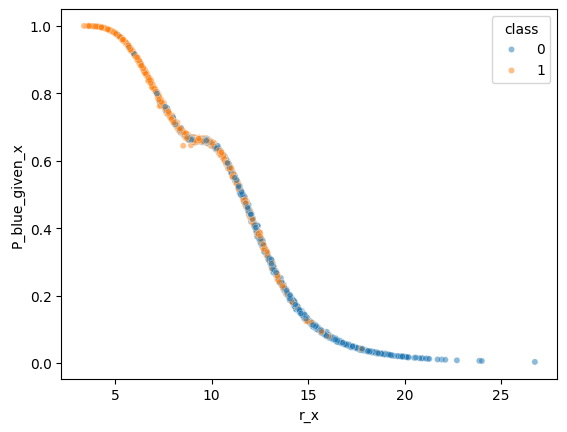

In [29]:
sn.scatterplot(cal_df, x="r_x", y="P_blue_given_x", hue="class", s=20, alpha=0.5)

<Axes: xlabel='P_blue_given_x', ylabel='Count'>

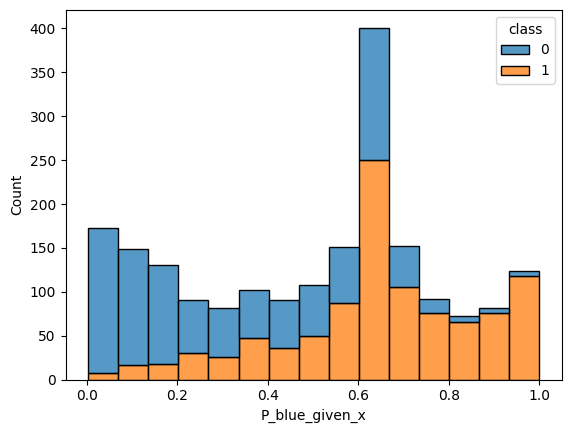

In [30]:
sn.histplot(cal_df, x="P_blue_given_x", hue="class", multiple="stack")